# Housing Prices

### Import Libraries

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler, normalize, QuantileTransformer
import matplotlib.pyplot as pt 
%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


### Analysing the Data

In [2]:
df = pd.read_csv('Data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#columns Name
df.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

In [4]:
#data shape or size 
df.shape

(1460, 81)

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Data preprocessing

#### Handle the null rows

In [6]:
#check the null rows
pd.DataFrame(df.isnull().sum())

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [7]:
df.fillna(0, inplace=True)

In [8]:
pd.DataFrame(df.isnull().sum())

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


#### Data Spliting

In [9]:
#transform string data to binary 0 or 1
tdf = pd.get_dummies(df, dtype=float)
X = np.asanyarray(tdf.drop(["SalePrice"], axis=1))
Y = np.asanyarray(tdf.SalePrice)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) 

In [28]:
corr = tdf.corr()
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,1.000000,0.011156,-0.019761,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,...,-0.020738,-0.018998,0.038920,0.026133,0.007009,-0.034852,-0.009018,0.004865,0.015881,-0.020738
MSSubClass,0.011156,1.000000,-0.215023,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,...,0.014005,-0.045156,-0.014555,0.026359,0.005003,0.016241,0.030002,0.000983,0.024359,-0.051068
LotFrontage,-0.019761,-0.215023,1.000000,0.100739,0.176561,-0.053457,0.036853,0.078686,0.105010,0.076670,...,-0.011881,0.183706,0.001366,-0.139867,-0.008876,-0.004724,-0.009519,0.028489,-0.134115,0.184103
LotArea,-0.033226,-0.139781,0.100739,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,...,-0.015040,0.020039,-0.005722,-0.002292,-0.029126,-0.013208,0.008966,-0.010781,0.005711,0.022635
OverallQual,-0.028365,0.032628,0.176561,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,...,-0.021172,0.327412,-0.057962,-0.225013,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,-0.034852,0.016241,-0.004724,-0.013208,-0.041677,-0.038888,-0.045601,-0.040294,-0.011783,-0.014874,...,-0.003073,-0.015827,-0.002378,0.020457,-0.014289,1.000000,-0.004772,-0.006177,-0.112080,-0.016038
SaleCondition_Alloca,-0.009018,0.030002,-0.009519,0.008966,-0.044950,-0.033444,-0.010104,-0.020727,-0.013748,0.021369,...,-0.005337,-0.027489,-0.004131,0.035530,-0.024817,-0.004772,1.000000,-0.010729,-0.194663,-0.027856
SaleCondition_Family,0.004865,0.000983,0.028489,-0.010781,-0.025515,-0.023873,-0.035785,-0.048056,-0.009535,0.000765,...,-0.006909,-0.035587,-0.005348,0.028599,-0.032128,-0.006177,-0.010729,1.000000,-0.252006,-0.036062
SaleCondition_Normal,0.015881,0.024359,-0.134115,0.005711,-0.143282,0.161642,-0.158427,-0.120577,-0.081539,-0.019560,...,0.027414,-0.645698,-0.097031,0.634322,-0.582947,-0.112080,-0.194663,-0.252006,1.000000,-0.654323


In [31]:
corr.drop(corr > 0.7)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial


#### Scaling data

In [12]:
scale_std = QuantileTransformer(n_quantiles=1050)
x_train_scaled = scale_std.fit_transform(pd.DataFrame(x_train))
y_train_scaled = scale_std.fit_transform(pd.DataFrame(y_train)) 

x_train_scaled = StandardScaler().fit_transform(pd.DataFrame(x_train_scaled))
y_train_scaled = StandardScaler().fit_transform(pd.DataFrame(y_train_scaled))


C:\Users\micro\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:2824: UserWarning: n_quantiles (1050) is greater than the total number of samples (1022). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\micro\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:2824: UserWarning: n_quantiles (1050) is greater than the total number of samples (1022). n_quantiles is set to n_samples.
  warnings.warn(


In [13]:
pd.DataFrame(x_train_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,294,295,296,297,298,299,300,301,302,303
count,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,...,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03
mean,3.928147e-16,1.207992e-15,-3.587476e-15,1.738118e-16,-2.983306e-14,1.461757e-15,1.616450e-15,2.589796e-15,-4.675538e-16,5.948710e-16,...,-1.738118e-18,8.951309e-17,2.085742e-17,-1.016799e-16,-1.216683e-17,-2.433366e-17,-3.476236e-17,3.302425e-17,1.320970e-16,2.085742e-17
std,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,...,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00
min,-1.730357e+00,-1.199259e+00,-1.540918e+00,-1.730258e+00,-1.772657e+00,-1.920874e+00,-1.730756e+00,-1.638834e+00,-8.431212e-01,-1.293815e+00,...,-5.425922e-02,-2.992528e-01,-3.129588e-02,-2.631061e+00,-2.669809e-01,-6.268391e-02,-7.011719e-02,-1.300593e-01,-2.170138e+00,-3.011894e-01
25%,-8.651784e-01,-1.199259e+00,-7.468277e-01,-8.663662e-01,-9.860447e-01,-6.079539e-01,-8.730061e-01,-8.027895e-01,-8.431212e-01,-1.293815e+00,...,-5.425922e-02,-2.992528e-01,-3.129588e-02,3.800748e-01,-2.669809e-01,-6.268391e-02,-7.011719e-02,-1.300593e-01,4.608003e-01,-3.011894e-01
50%,3.842412e-16,1.143463e-01,6.367543e-02,2.040483e-02,-6.051586e-02,-6.079539e-01,-2.034189e-02,3.651392e-02,-8.431212e-01,1.453170e-01,...,-5.425922e-02,-2.992528e-01,-3.129588e-02,3.800748e-01,-2.669809e-01,-6.268391e-02,-7.011719e-02,-1.300593e-01,4.608003e-01,-3.011894e-01
75%,8.651784e-01,8.744964e-01,8.397888e-01,8.677732e-01,8.094465e-01,8.178242e-01,8.763964e-01,9.133008e-01,1.045471e+00,8.627687e-01,...,-5.425922e-02,-2.992528e-01,-3.129588e-02,3.800748e-01,-2.669809e-01,-6.268391e-02,-7.011719e-02,-1.300593e-01,4.608003e-01,-3.011894e-01
max,1.730357e+00,1.577533e+00,1.651074e+00,1.730394e+00,1.773177e+00,1.920075e+00,1.730756e+00,1.689045e+00,1.672538e+00,1.584449e+00,...,1.843005e+01,3.341656e+00,3.195309e+01,3.800748e-01,3.745586e+00,1.595306e+01,1.426184e+01,7.688800e+00,4.608003e-01,3.320170e+00


### Training the model

In [41]:
svr = SVR()
p_grids = {
    'kernel': ['linear'],
}
model = GridSearchCV(estimator=svr, param_grid=p_grids, n_jobs=-1, cv=30)
model.fit(x_train_scaled ,y_train_scaled.ravel())

GridSearchCV(cv=30, estimator=SVR(), n_jobs=-1,
             param_grid={'kernel': ['linear']})

In [42]:
model.best_score_

0.8877319054684047

### scaling the test data to make match with the model

In [43]:
x_test_scaled = scale_std.fit_transform(pd.DataFrame(x_test))
y_test_scaled = scale_std.fit_transform(pd.DataFrame(y_test)) 

x_test_scaled = StandardScaler().fit_transform(pd.DataFrame(x_test_scaled))
y_test_scaled = StandardScaler().fit_transform(pd.DataFrame(y_test_scaled))

C:\Users\micro\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:2824: UserWarning: n_quantiles (1050) is greater than the total number of samples (438). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\micro\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:2824: UserWarning: n_quantiles (1050) is greater than the total number of samples (438). n_quantiles is set to n_samples.
  warnings.warn(


In [44]:
model.score(x_test_scaled, y_test_scaled)

0.8786072736746465

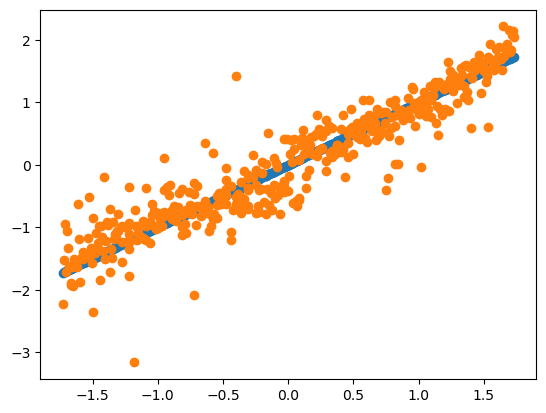

In [45]:
pred = model.predict(x_test_scaled)
pt.scatter(y_test_scaled, y_test_scaled)
pt.scatter(y_test_scaled, pred)

In [46]:
test = pd.read_csv('Data/test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [47]:
test.fillna(0, inplace=True)
test = pd.get_dummies(test, dtype=float)

In [48]:
test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
